In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
plt.style.use('dark_background')

In [2]:
l = 1
h = 0.0002
n = int(l/h)
x = np.linspace(0, l, n)

b, a, c = 2.0*np.ones(n), -1.0*np.ones(n-1), -1.0*np.ones(n-1)
b[0], b[-1] = 1, 1
a, b, c = a/h**2, b/h**2, c/h**2
diagonals = [2.0*np.ones(n), -1.0*np.ones(n-1), -1.0*np.ones(n-1)]
A = diags(diagonals, [0, -1, 1]).toarray()
A[0, 0], A[-1, -1] = 1, 1
A /= (h**2)

In [3]:
def TDMA(a, b, c, d):
    k = len(d)
    for i in range(1, k):
        m = a[i-1]/b[i-1]
        b[i] -= m*c[i-1]
        d[i] -= m*d[i-1]
    x = np.zeros(k)
    x[-1] = d[-1]/b[-1]
    for i in range(n-2, -1, -1):
        x[i] = (d[i]-c[i]*x[i+1])/b[i]
    return x

In [4]:
def rayleigh_iteration(A, l, n):
    v = np.random.randn(n)
    l1 = l
    err = 1e-5
    while err > 1e-10:
        v = TDMA(a, b-l, c, v)
        v /= np.linalg.norm(v)
        l = v.T@A@v/(v.T@v)
        err = np.abs(l-l1)
        l1 = l
    return l, v

In [5]:
evals = []
evecs = []
l0 = [(k*np.pi)**2 for k in range(1, 6)]

for li in l0:
    lj, vj = rayleigh_iteration(A, li, n)
    evals.append(lj)
    evecs.append(vj)

exact_vals = [(k*np.pi)**2 for k in range(1, 6)]
print(evals)
print(exact_vals)

[9.869604076397872, 39.47841240917304, 88.82641330937388, 157.91358729503864, 246.73990709170877]
[9.869604401089358, 39.47841760435743, 88.82643960980423, 157.91367041742973, 246.74011002723395]


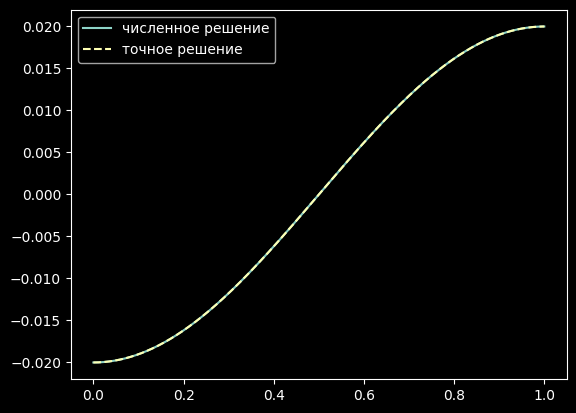

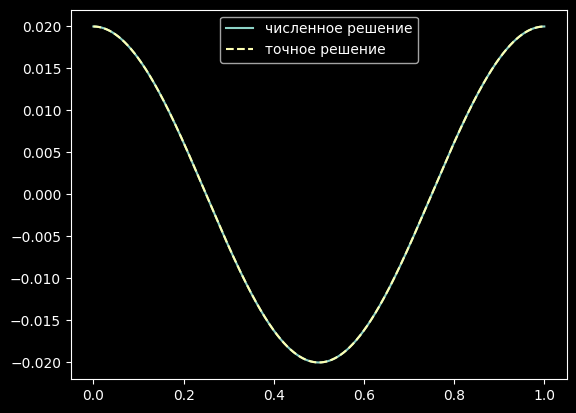

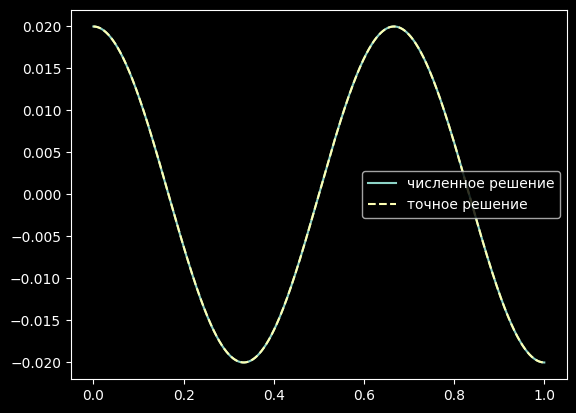

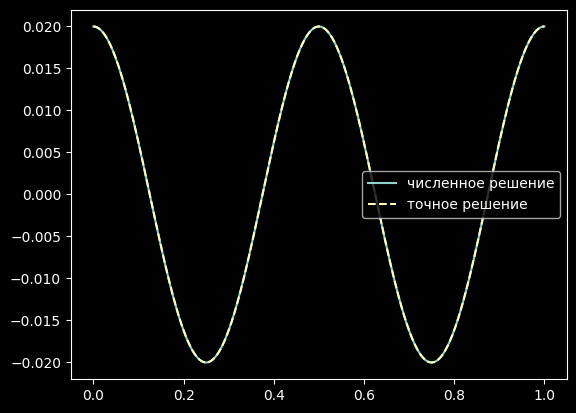

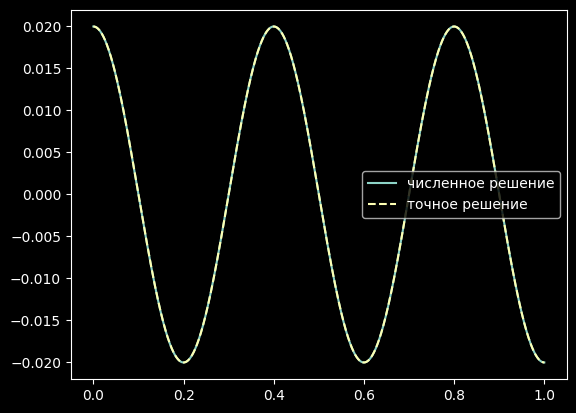

In [6]:
exact_vecs = [np.cos((k*np.pi/l)*x)/np.linalg.norm(np.cos((k*np.pi/l)*x)) for k in range(1, 6)]
exact_vecs = [exact_vecs[i] if exact_vecs[i][0]*evecs[i][0] > 0 else -exact_vecs[i] for i in range(np.shape(evecs)[0])]

for i in range(5): 
    fig = plt.figure()
    plt.plot(x, evecs[i], label=f"численное решение")
    plt.legend()
    plt.plot(x, exact_vecs[i], '--', label=f"точное решение")
    plt.legend()
    plt.show

In [7]:
def rayleigh_iteration2(A, l, n):
    v = np.random.randn(n)
    l1 = l
    err = 1e-5
    while err > 1e-10:
        v = np.linalg.solve(A-l*np.eye(A.shape[0]), v)
        v /= np.linalg.norm(v)
        l = v.T@A@v/(v.T@v)
        err = np.abs(l-l1)
        l1 = l
    return l, v

In [9]:
for hi in [0.02, 0.002, 0.0002]:
    ni = int(l/hi)
    diagonalsi = [2.0*np.ones(ni), -1.0*np.ones(ni-1), -1.0*np.ones(ni-1)]
    Ai = diags(diagonalsi, [0, -1, 1]).toarray()
    Ai[0, 0], Ai[-1, -1] = 1, 1
    Ai /= (hi**2)
    li = rayleigh_iteration2(Ai, l0[0], ni)[0]
    print(np.abs(li-exact_vals[0]))

0.0032465424471723736
3.246965323455697e-05
3.2470979682841516e-07
